In [1]:
%pylab inline
from scipy.special import j0, j1

Populating the interactive namespace from numpy and matplotlib


In [2]:
def gamma_to_beta(gamma):
    return sqrt(1 - 1 / gamma**2)


def kinetic_to_betagamma(energy, rest_energy):
    gamma = energy / rest_energy + 1
    beta = gamma_to_beta(gamma)
    return beta, gamma

In [3]:
m = 938.27208816  # MeV/c^2
c = 299792458  # m/s
f = 200e6  # Hz
omega = 2 * pi * f  # Hz
p01 = 2.40482556
a = c * p01 / omega
phi0 = -30 / 180 * pi  # 90/180*pi
E0 = 1e6  # In MV, that should give MeV acceleration
q = 1  # We keep everything in eV so the charge for a proton will be 1
K = 100
beta, gamma = kinetic_to_betagamma(K, m)

In [4]:
def step1(h, vector):  # exp(-h/2:Kx:)
    result = {}
    result["x"] = vector["x"] - vector["Px"] * h / (2 * m)
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result


def step2(h, vector):  # exp(-h/2:Ky)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"] - vector["Py"] * h / (2 * m)
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result


def step3(h, vector):  # exp(q:Uz:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = (
        -E0
        * p01
        * q
        * vector["x"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Px"]
    )
    result["Py"] = (
        -E0
        * p01
        * q
        * vector["y"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Py"]
    )
    result["Pz"] = (
        E0
        * q
        * cos(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / omega
        + vector["Pz"]
    )
    result["Pt"] = (
        -E0
        * q
        * vector["z"]
        * sin(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        + vector["Pt"]
    )
    return result


def step4(h, vector):  # exp(-h/2:Kz:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = -vector["Pz"] * h / (2 * m) + vector["z"]
    result["t"] = vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result


def step5(h, vector):  # exp(-q:Uz:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = (
        E0
        * p01
        * q
        * vector["x"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Px"]
    )
    result["Py"] = (
        E0
        * p01
        * q
        * vector["y"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Py"]
    )
    result["Pz"] = (
        -E0
        * q
        * cos(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / omega
        + vector["Pz"]
    )
    result["Pt"] = (
        E0
        * q
        * vector["z"]
        * sin(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        + vector["Pt"]
    )
    return result


def step6(h, vector):  # exp(-h:Kt:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["Pt"] * h / m + vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result


def step7(h, vector):  # exp(q:Uz:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = (
        -E0
        * p01
        * q
        * vector["x"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Px"]
    )
    result["Py"] = (
        -E0
        * p01
        * q
        * vector["y"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Py"]
    )
    result["Pz"] = (
        E0
        * q
        * cos(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / omega
        + vector["Pz"]
    )
    result["Pt"] = (
        -E0
        * q
        * vector["z"]
        * sin(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        + vector["Pt"]
    )
    return result


def step8(h, vector):  # exp(-h/2:Kz:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = -vector["Pz"] * h / (2 * m) + vector["z"]
    result["t"] = vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result


def step9(h, vector):  # exp(-q:Uz:)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = (
        E0
        * p01
        * q
        * vector["x"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Px"]
    )
    result["Py"] = (
        E0
        * p01
        * q
        * vector["y"]
        * vector["z"]
        * cos(omega * vector["t"] + phi0)
        * j1(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / (a * omega * sqrt(vector["x"] ** 2 + vector["y"] ** 2))
        + vector["Py"]
    )
    result["Pz"] = (
        -E0
        * q
        * cos(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        / omega
        + vector["Pz"]
    )
    result["Pt"] = (
        E0
        * q
        * vector["z"]
        * sin(omega * vector["t"] + phi0)
        * j0(p01 * sqrt(vector["x"] ** 2 + vector["y"] ** 2) / a)
        + vector["Pt"]
    )
    return result


def step10(h, vector):  # exp(-h/2:Ky)
    result = {}
    result["x"] = vector["x"]
    result["y"] = vector["y"] - vector["Py"] * h / (2 * m)
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result


def step11(h, vector):  # exp(-h/2:Kx:)
    result = {}
    result["x"] = vector["x"] - vector["Px"] * h / (2 * m)
    result["y"] = vector["y"]
    result["z"] = vector["z"]
    result["t"] = vector["t"]
    result["Px"] = vector["Px"]
    result["Py"] = vector["Py"]
    result["Pz"] = vector["Pz"]
    result["Pt"] = vector["Pt"]
    return result

In [61]:
x = numpy.random.normal(0, 1e-3, 1000)
y = numpy.random.uniform(-1e-3, 1e-3, 1000)
z = numpy.random.uniform(-1e-2, 1e-2, 1000)
t = numpy.random.uniform(-1e-2 / (beta * c), 1e-2 / (beta * c), 1000)
Px = numpy.random.normal(0, 1e1, 1000)
Py = numpy.random.uniform(-0.1, 0.1, 1000)
Pz = numpy.random.uniform(-1e5, 1e5, 1000)
Pt = numpy.random.uniform(100, 110, 1000)
init_beam = {"x": x, "y": y, "z": z, "t": t, "Px": Px, "Py": Py, "Pz": Pz, "Pt": Pt}

In [62]:
h = 0.01 / (beta * gamma)
coso = [init_beam["Pt"].mean()]
beam = init_beam
for i in range(1, 100):
    beam = step1(h, beam)
    beam = step2(h, beam)
    beam = step3(h, beam)
    beam = step4(h, beam)
    beam = step5(h, beam)
    beam = step6(h, beam)
    beam = step7(h, beam)
    beam = step8(h, beam)
    beam = step9(h, beam)
    beam = step10(h, beam)
    beam = step11(h, beam)
    coso.append(beam["Pt"].mean())

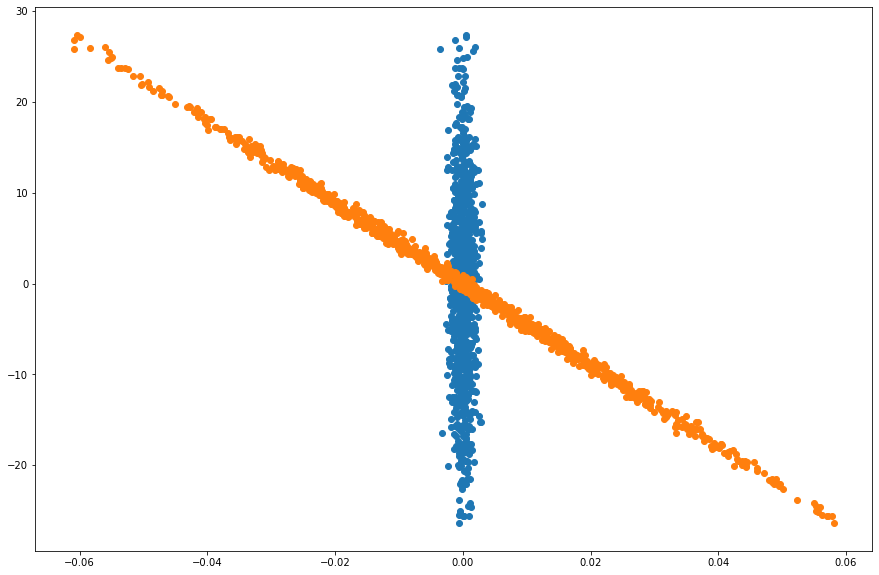

In [63]:
plt.figure(figsize=(15, 10))
plt.scatter(init_beam["x"], init_beam["Px"])
plt.scatter(beam["x"], beam["Px"])

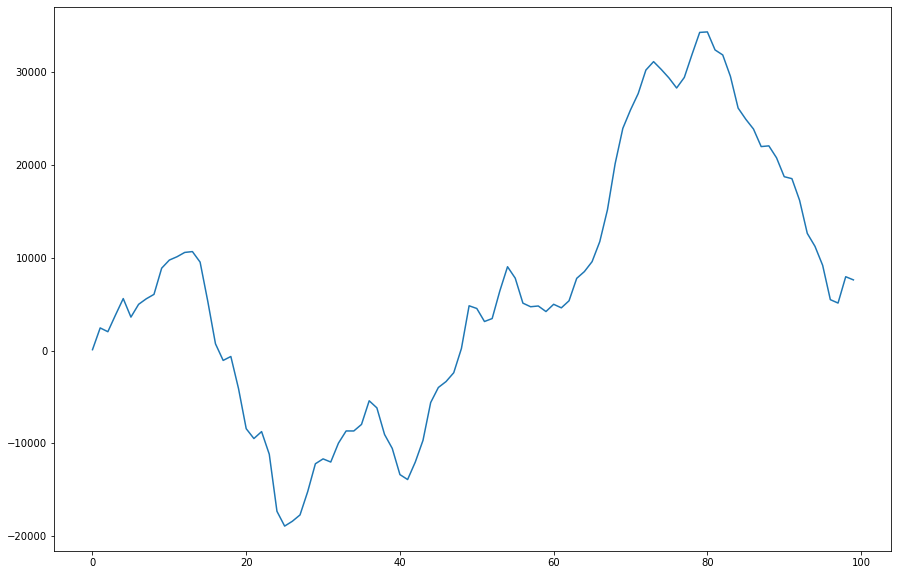

In [43]:
plt.figure(figsize=(15, 10))
plt.plot(coso)